In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Training/498R/SDN intrusion/SDN_Intrusion.csv")

In [ ]:
df.head()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,80,9865922,5,0,30,0,6,6,6.000000,...,20,1986.00000,0.0000,1986,1986,9.863936e+06,0.00000,9863936,9863936,DDoS
1,1,443,158423,24,22,703,24564,453,0,29.291667,...,32,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN
2,2,443,61163904,14,12,993,3445,620,0,70.928571,...,20,147216.66670,152989.5108,459505,84515,1.000000e+07,21747.04690,10100000,9999779,BENIGN
3,3,443,110544045,18,18,1213,4216,812,0,67.388889,...,20,75305.72727,133115.4997,476664,35046,9.970950e+06,80601.91884,10000000,9728297,BENIGN
4,4,53,185,2,2,104,136,52,52,52.000000,...,20,0.00000,0.0000,0,0,0.000000e+00,0.00000,0,0,BENIGN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188333 entries, 0 to 1188332
Data columns (total 80 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1188333 non-null  int64  
 1    Destination Port             1188333 non-null  int64  
 2    Flow Duration                1188333 non-null  int64  
 3    Total Fwd Packets            1188333 non-null  int64  
 4    Total Backward Packets       1188333 non-null  int64  
 5   Total Length of Fwd Packets   1188333 non-null  int64  
 6    Total Length of Bwd Packets  1188333 non-null  int64  
 7    Fwd Packet Length Max        1188333 non-null  int64  
 8    Fwd Packet Length Min        1188333 non-null  int64  
 9    Fwd Packet Length Mean       1188333 non-null  float64
 10   Fwd Packet Length Std        1188333 non-null  float64
 11  Bwd Packet Length Max         1188333 non-null  int64  
 12   Bwd Packet Length Min      

In [ ]:
df.shape

(820834, 54)

In [ ]:
df['class3'].value_counts()

0    421417
1    399417
Name: class3, dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isna().sum()

Scr_port                       0
Des_IP                         0
Des_port                       0
Duration                       0
Scr_bytes                      0
Des_bytes                      0
Conn_state                     0
missed_bytes                   0
Scr_pkts                       0
Scr_ip_bytes                   0
Des_pkts                       0
Des_ip_bytes                   0
anomaly_alert                  0
total_bytes                    0
total_packet                   0
paket_rate                     0
byte_rate                      0
Scr_packts_ratio               0
Des_pkts_ratio                 0
Scr_bytes_ratio                0
Des_bytes_ratio                0
Avg_user_time                  0
Std_user_time                  0
Avg_nice_time                  0
Std_nice_time                  0
Avg_system_time                0
Std_system_time                0
Avg_iowait_time                0
Std_iowait_time                0
Avg_ideal_time                 0
Std_ideal_

In [ ]:
df.describe()

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,Scr_pkts,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Std_user_time,Avg_nice_time,Std_nice_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class3
count,820834.000000,8.208340e+05,8.208340e+05,820834.000000,8.208340e+05,820834.000000,820834.000000,8.208340e+05,820834.000000,8.208340e+05,820834.000000,8.208340e+05,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,8.208340e+05,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000
mean,8.834584,1.500625e+03,4.104829e+04,0.851623,3.561576e+01,19.610256,27.848024,4.336439e+04,0.097986,8.837400e+04,47.458280,2.179966e+04,0.524060,0.289858,0.416419,0.310844,5.852589,2.703972,1.546433,80.399094,9.474753,15.827923,13.075035,7.118150,9.591289,8.709792,5.901643,0.994898,4.269682e+14,2.691026,2.956026,3941.385582,622.624107,0.051186,0.267717,0.087305,0.082730,0.072650,0.082620,0.355309,0.082456,0.486599
std,113.660695,7.446342e+03,2.806029e+05,0.355474,3.979548e+03,270.671744,262.677235,2.911188e+05,0.297296,5.796652e+05,527.248291,8.198869e+04,0.322195,0.245415,0.358411,0.315697,2.401832,2.002247,0.842467,13.706643,4.471797,15.711332,14.693682,15.102222,15.410537,4.261599,5.130804,0.646792,5.095343e+16,580.091032,820.360451,5265.891393,863.021587,0.220377,1.178027,0.282282,0.275475,0.259562,0.275307,0.478607,0.275059,0.499821
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000094,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000e+00,0.433333,0.000000,0.000000,0.000000,4.350634,1.695000,1.043994,76.106000,6.749701,9.100000,5.325411,0.100000,0.300000,4.600000,1.417745,0.532000,2.227106e-02,0.402000,0.400000,1333.200000,233.682348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004985,4.500000e+01,3.500000e+01,1.000000,0.000000e+00,2.000000,1.000000,6.300000e+01,0.000000,2.240000e+02,2.000000,1.855004e+01,0.500000,0.428571,0.500000,0.346878,5.690563,2.164000,1.386753,85.705000,8.662258,13.800000,10.336827,3.800000,6.103278,9.200000,5.079370,0.795000,3.500000e-02,0.800000,0.629314,1526.600000,314.920879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.961307,6.080000e+02,3.100000e+02,1.000000,0.000000e+00,6.000000,5.000000,5.630000e+02,0.000000,2.378000e+03,10.000000,5.917160e+03,0.666667,0.500000,0.632099,0.500000,7.146500,2.815000,1.771168,90.043000,11.477920,20.800000,16.973214,11.100000,13.030104,11.600000,8.953076,1.275000,6.184658e-02,1.400000,1.200000,2370.300000,468.824157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,9331.420034,1.665228e+06,1.935968e+07,1.000000,1.882937e+06,65541.000000,65575.000000,2.011009e+07,1.000000,3.916347e+07,131116.000000,3.000000e+06,1.000000,1.000000,1.000000,1.000000,29.770909,21.203000,19.400489,98.590000,60.441650,1053.700000,533.356588,1047.600000,531.959998,60.600000,144.416907,4.307000,6.940000e+18,303432.000000,42

In [ ]:
df.corr()

,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,Scr_pkts,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Std_user_time,Avg_nice_time,Std_nice_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class3
Duration,1.000000,0.206742,0.027539,0.023279,0.001008,0.205654,0.126461,0.032718,-0.009995,0.040097,0.168580,-0.020662,0.028568,-0.007470,0.051672,-0.013979,0.005495,-0.011827,0.000794,-0.054433,0.008039,0.000399,0.002339,0.003302,0.001378,-0.010232,-0.003322,0.017108,-0.000355,-0.000201,-0.000158,0.040027,0.025696,-0.016914,-0.016507,-0.013604,-0.013478,-0.012769,-0.013493,0.091144,-0.013503,0.017603
Scr_bytes,0.206742,1.000000,0.445156,-0.012334,0.020650,0.557533,0.563436,0.463281,0.023519,0.487554,0.566925,-0.050603,-0.027584,0.189018,-0.039308,0.218728,0.004886,-0.030007,-0.002565,0.029379,0.004614,-0.000717,-0.000689,0.001492,0.000758,-0.007933,-0.004279,-0.040996,-0.000486,0.000375,0.000258,-0.049232,-0.039367,-0.033386,-0.033094,0.047168,0.049833,0.055890,0.049812,0.202692,0.050023,-0.086024
Des_bytes,0.027539,0.445156,1.000000,-0.002783,0.036831,0.126971,0.217754,0.990313,-0.033151,0.995779,0.173668,-0.038790,-0.061027,0.191039,-0.157875,0.305615,0.023506,-0.020557,0.008213,0.055713,0.019476,0.003093,0.003349,0.004078,0.004342,-0.003053,0.001061,-0.051358,-0.000745,0.001215,0.001232,-0.067574,-0.050607,-0.031627,-0.031039,0.003709,0.006147,0.007929,0.006125,0.195330,0.006302,-0.138214
Conn_state,0.023279,-0.012334,-0.002783,1.000000,-0.001455,-0.007854,-0.023452,-0.004041,0.094171,-0.003877,-0.015716,-0.024562,0.199406,-0.136925,0.062222,-0.085551,0.068132,0.161756,0.116997,-0.238737,0.068961,-0.045282,0.001867,-0.017748,-0.013104,-0.104046,0.033684,0.200333,0.003031,0.001037,0.000884,0.204063,0.171399,0.093777,0.091738,0.091885,0.088456,0.094583,0.088379,0.135032,0.088161,-0.288629
missed_bytes,0.001008,0.020650,0.036831,-0.001455,1.000000,0.004191,0.006908,0.024106,-0.002330,0.030552,0.005593,-0.002377,-0.005996,0.007438,-0.009746,0.013185,0.002047,-0.001508,0.000455,-0.003317,0.016442,0.003600,0.005056,0.002934,0.004198,0.002876,0.005077,-0.000918,0.005504,-0.000011,-0.000011,-0.004135,-0.002631,-0.002078,-0.002034,-0.001791,-0.001688,-0.001444,-0.001685,0.012053,-0.001681,-0.008691
Scr_pkts,0.205654,0.557533,0.126971,-0.007854,0.004191,1.000000,0.954498,0.171839,0.016306,0.186342,0.988901,-0.017250,-0.017597,0.078037,-0.033797,0.099945,0.002482,-0.008699,0.000109,0.009972,0.003802,0.001990,0.002417,0.004123,0.003492,-0.007275,-0.003347,-0.023536,-0.000214,0.000477,0.000488,-0.030807,-0.023405,-0.011479,-0.011352,-0.004425,-0.003934,-0.002973,-0.003948,0.082505,-0.003874,-0.025817
Des_pkts,0.126461,0.563436,0.217754,-0.023452,0.006908,0.954498,1.000000,0.266123,0.012015,0.276580,0.988211,-0.027589,-0.044027,0.138186,-0.077329,0.179381,0.012756,-0.013581,0.001500,0.029828,0.011864,0.003437,0.003568,0.005034,0.004778,-0.005169,-0.002347,-0.034807,-0.000341,0.000968,0.000990,-0.048478,-0.036827,-0.018735,-0.018457,-0.007804,-0.007074,-0.005578,-0.007101,0.131344,-0.006981,-0.061901
Des_ip_bytes,0.032718,0.463281,0.990313,-0.004041,0.024106,0.171839,0.266123,1.000000,-0.031513,0.997618,0.220800,-0.039477,-0.062361,0.194817,-0.159022,0.309225,0.025347,-0.020629,0.008129,0.055484,0.020291,0.003664,0.003956,0.004652,0.005052,-0.002976,0.000983,-0.051352,-0.000837,0.001195,0.001214,-0.068802,-0.051553,-0.031986,-0.031395,0.003170,0.005599,0.006933,0.005539,0.198450,0.005756,-0.138931
anomaly_alert,-0.009995,0.023519,-0.033151,0.094171,-0.002330,0.016306,0.012015,-0.031513,1.000000,-0.030928,0.014357,0.225512,0.117955,-0.195940,0.210541,-0.206807,-0.052042,-0.075646,-0.036315,0.135966,-

In [ ]:
df=df.replace('?','0')

In [ ]:
df=df.drop('Std_system_time',axis=1)

In [ ]:
df=df.drop('Avg_iowait_time',axis=1)

In [ ]:
df=df.drop('Std_iowait_time',axis=1)

In [ ]:
df=df.replace('192.168.2.10','1')

In [ ]:
df=df.drop('Des_IP',axis=1)

In [ ]:
df=df.replace('excel','0')

In [ ]:
df=df.replace('aza','0')

In [ ]:
df=df.drop('Scr_port',axis=1)


In [ ]:
df=df.drop('Des_port',axis=1)

In [ ]:
df=df.drop('Scr_ip_bytes',axis=1)

In [ ]:
df=df.drop('byte_rate',axis=1)

In [ ]:
df=df.drop('Avg_system_time',axis=1)

In [ ]:
df=df.drop('Avg_kbmemused',axis=1)

In [ ]:
df=df.drop('Std_kbmemused',axis=1)

In [ ]:
df=df.drop('Avg_user_time',axis=1)

In [ ]:
x=df.iloc[:,:-1] #remove class atribute

In [ ]:
x.shape

(820834, 41)

In [ ]:
y=df.iloc[:,41] #set target column

In [ ]:
y

0         1
1         0
2         0
3         0
4         0
         ..
820829    1
820830    0
820831    0
820832    1
820833    0
Name: class3, Length: 820834, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rclf=RandomForestClassifier()  #create object

In [ ]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
Rclf.score(xtest,ytest)

0.9938112177769115

In [ ]:
y_pred_rclf = rclf_model.predict(X_test_s)
print(classification_report(y_test, y_pred_rclf))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      3649
      Normal       1.00      1.00      1.00      3639

    accuracy                           1.00      7288
   macro avg       1.00      1.00      1.00      7288
weighted avg       1.00      1.00      1.00      7288



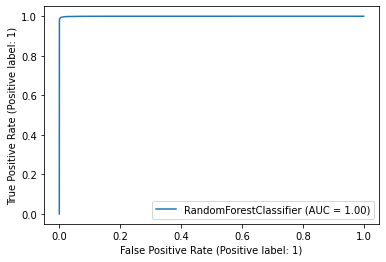

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Rclf, xtest, ytest)

In [ ]:
y_pred=Rclf.predict(xtest)

In [ ]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

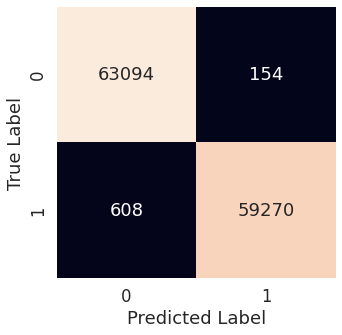

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix(ytest,y_pred)

In [ ]:
from sklearn.tree import SVMclassifier

In [ ]:
svc=SVMClassifier()

In [ ]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
Clf.score(xtest,ytest)

0.9924873706609489

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, plot_roc_curve

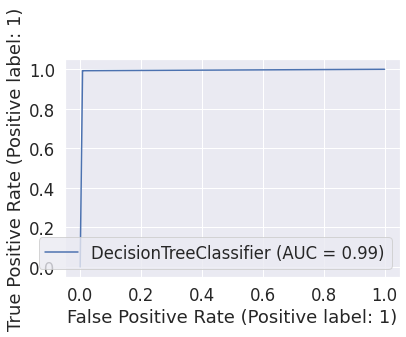

In [ ]:
plot_roc_curve(Clf, xtest, ytest);

In [ ]:
y_pred=Clf.predict(xtest)

In [ ]:
y_pred_clf = clf_model.predict(X_test_s)
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      3649
      Normal       1.00      1.00      1.00      3639

    accuracy                           1.00      7288
   macro avg       1.00      1.00      1.00      7288
weighted avg       1.00      1.00      1.00      7288



In [ ]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

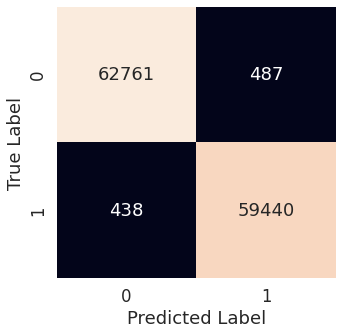

In [ ]:
conf_matrix(ytest,y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBClassifier

grad_model = GradientBoostingClassifier()
grad_model.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [ ]:
grad_model.score(xtest,ytest)

0.9972035794183445

In [ ]:
y_pred=grad_model.predict(xtest)

In [ ]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [ ]:
y_pred_grad = grad_model.predict(X_test_s)
print(classification_report(y_test, y_pred_grad))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      3649
      Normal       1.00      1.00      1.00      3639

    accuracy                           1.00      7288
   macro avg       1.00      1.00      1.00      7288
weighted avg       1.00      1.00      1.00      7288



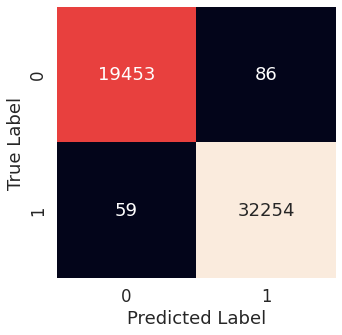

In [ ]:
conf_matrix(ytest,y_pred)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [ ]:
ada.score(xtest,ytest)

0.9934428758774975

In [ ]:
y_pred_ada = ada_model.predict(X_test_s)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      3649
      Normal       1.00      1.00      1.00      3639

    accuracy                           1.00      7288
   macro avg       1.00      1.00      1.00      7288
weighted avg       1.00      1.00      1.00      7288



In [ ]:
y_pred=ada.predict(xtest)

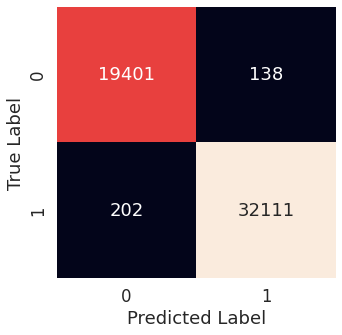

In [ ]:
conf_matrix(ytest,y_pred)